In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Visualizacion 1

In [2]:
#Import Data
gameDf = pd.read_csv (r'gameData.csv')
print(gameDf.head(5))

        Date      CSGO  Minecraft  Nier Automata
0  1/04/2019  49200000   58500000          74700
1  1/05/2019  72300000   88700000         100000
2  1/06/2019  67500000   82200000         100000
3  1/07/2019  60900000   79900000         150000
4  1/08/2019  60500000   72000000         111000


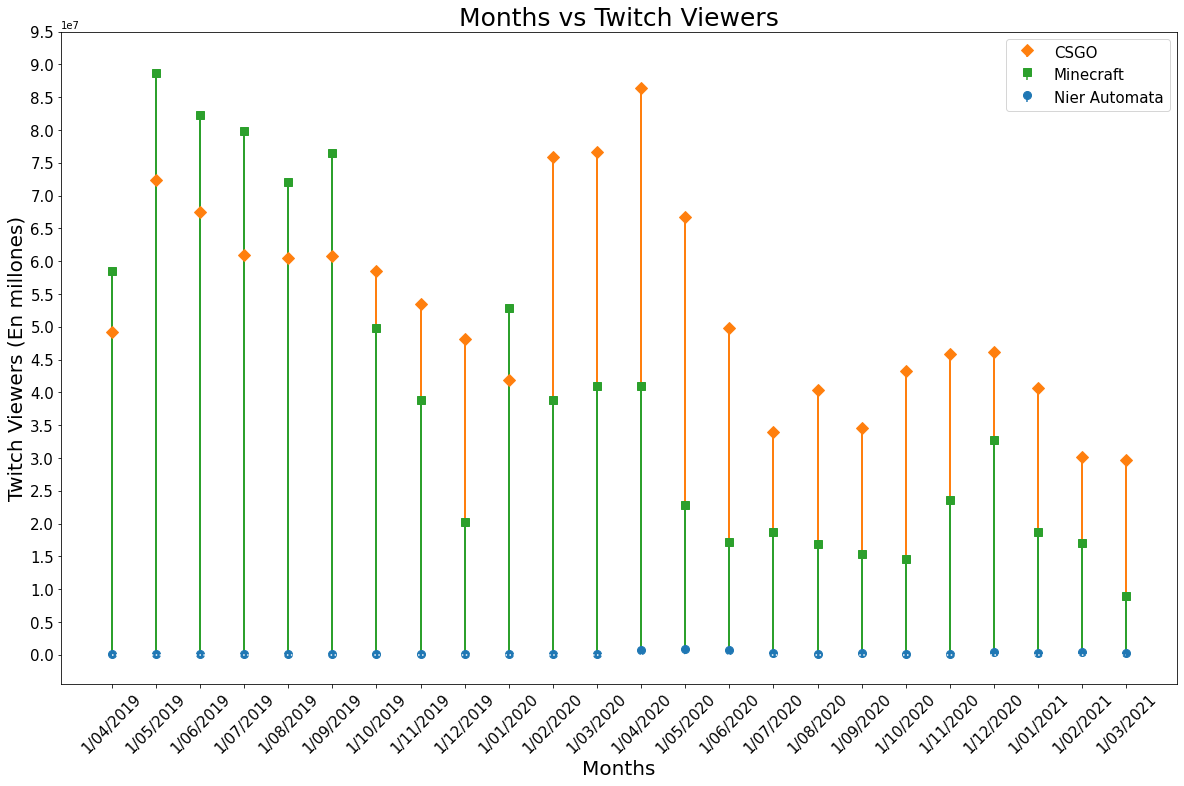

In [3]:
# Make the plot
plt.figure(figsize=(20,12))
plt.xticks(rotation='45')

# Generate Lollipop Plot for each game
#Game 1
markerline1, stemlines1, _ = plt.stem(gameDf['CSGO'],use_line_collection=True, 
                                              linefmt="C1",markerfmt="C1D", basefmt="w:")
plt.setp(stemlines1, "linewidth", 2)
plt.setp(markerline1, "markersize", 8)

#Game 2
markerline2, stemlines2, _ = plt.stem(gameDf['Minecraft'],use_line_collection=True, 
                                              linefmt="C2",markerfmt="C2s", basefmt="w:")
plt.setp(stemlines2, "linewidth", 2)
plt.setp(markerline2, "markersize", 8)

#Game 3
markerline3, stemlines3, _ = plt.stem(gameDf['Nier Automata'],use_line_collection=True, 
                                              linefmt="C0",markerfmt="C0o", basefmt="w:")
plt.setp(stemlines3, "linewidth", 2)
plt.setp(markerline3, "markersize", 8)

# Customize legend and labels
plt.legend(["CSGO","Minecraft","Nier Automata"], fontsize=15)
plt.title("Months vs Twitch Viewers", fontsize=25)
plt.xticks(range(0,len(gameDf.index)), gameDf["Date"], fontsize=15)
plt.xlabel("Months", fontsize=20)
plt.yticks( np.arange(0, 100000000, 5000000), fontsize=15)
plt.ylabel("Twitch Viewers (En millones)", fontsize=20, )

plt.show()

## Visualizacion 2

In [4]:
#Change data from Stg to Int
movieDf = pd.read_csv (r'movieData.csv')
print(movieDf.head(10))

   Rating  Dark Knight  Lord of Rings  Avengers
0       1         1.31           1.75      2.64
1       2         0.31           0.40      0.51
2       3         0.35           0.49      0.66
3       4         0.49           0.66      0.96
4       5         1.00           1.33      2.16
5       6         2.13           2.72      4.81
6       7         5.95           7.13     11.11
7       8        15.35          16.42     19.25
8       9        28.14          26.34     21.56
9      10        44.95          42.78     36.33


In [12]:
# Dictionary with dataframes for each movie
movie_names = ['Dark Knight', 'Lord of Rings', 'Avengers']

movie_data = {"Dark Knight": movieDf["Dark Knight"], 
              "Lord of Rings": movieDf["Dark Knight"], 
              "Avengers": movieDf["Dark Knight"]}

movie_colors = {"Dark Knight": "#3333ff", 
              "Lord of Rings": "#ff9966", 
              "Avengers": "#80ffaa"}

# Create figure
fig = go.Figure()

for movie_names, movie in movie_data.items():
    fig.add_trace(go.Scatter(
        x=movieDf['Rating'], y=movieDf[movie_names],
        name=movie_names, text=movieDf[movie_names],
        marker_size=15,
        #marker_symbol="diamond-wide",
        marker_symbol="x-thin",
        marker_color=movie_colors[movie_names],
        marker_line_color=movie_colors[movie_names],
        marker_line_width=2,
    ))

#Add vertical line
fig.add_shape(type="line",
    x0=4.5, y0=0, x1=4.5, y1=47,
    line=dict(color="#ff3333",width=2,dash="dot",)
)

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',sizeref=10))

fig.update_layout(
    title='Rating Percent vs Rating Level',
    height=900,
    xaxis=dict(
        title='Rating Level',
        gridcolor='white',
        type="category"
    ),
    yaxis=dict(
        title='Raiting Percent',
        gridcolor='white',
        gridwidth=2,
        range=[-2,47]
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()